In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
set_of_data = 'physionet' # swell-kw
file_names = ['000','003','005','006','007','008','009','010','013']

folder_input_path = f'/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/data-hrv-{set_of_data}/'
# output_output_path = '/content/drive/My Drive/Colab Notebooks/Ch4_HR_HRV_Generation/'
folder_model_path = '/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/models/'

In [37]:
import pickle

model_file_name = 'model_xgb_fset_2.sav'
# load the previously saved model from a file
model = pickle.load(open(folder_model_path + model_file_name, 'rb'))

In [26]:
from joblib import dump, load
# Load the label_encoder
label_encoder = load(folder_model_path + 'label_encoder.joblib')

In [27]:
features = ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD','HR']

In [35]:
def classify_hrv(df, f, le):
  X_classify_sub = df[f]

  y_pred = model.predict(X_classify_sub)
  y_pred_textual = le.inverse_transform(y_pred)

  df['condition'] = pd.Series(y_pred, index=X_classify_sub.index)
  df['condition_name'] = pd.Series(y_pred_textual, index=X_classify_sub.index)

  return df

In [38]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

for file_name in file_names:
  data_classify = pd.read_csv(folder_input_path + file_name + '_HRV.csv')
  df = classify_hrv(data_classify, features, label_encoder)
  print(file_name, df['condition_name'].value_counts(), data_classify['Interval_ID'].count())

000 no stress    1255
Name: condition_name, dtype: int64 1255
003 no stress    1281
Name: condition_name, dtype: int64 1281
005 no stress    1221
Name: condition_name, dtype: int64 1221
006 no stress    1312
Name: condition_name, dtype: int64 1312
007 no stress    715
Name: condition_name, dtype: int64 715
008 no stress    1365
Name: condition_name, dtype: int64 1365
009 no stress    1036
Name: condition_name, dtype: int64 1036
010 no stress    1333
Name: condition_name, dtype: int64 1333
013 no stress    1360
Name: condition_name, dtype: int64 1360


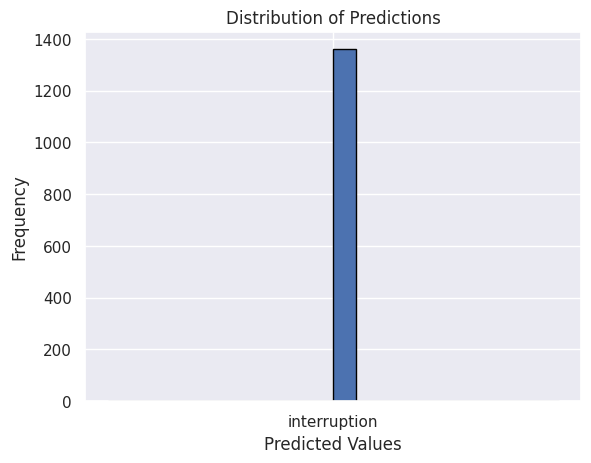

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set()

# Plot a histogram of the predictions
plt.hist(df['condition_name'], bins=20, edgecolor='black')

plt.title('Distribution of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')

plt.show()
